In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from utils import one_hot_label
from generate_data import generate_data
from modules import Dropout
from modules import Linear, Sequential
from modules.losses import LossMSE, LossSoftmaxCrossEntropy
from generate_data import generate_grid_data
from modules.activations import ReLU
from optimizers import SGD

In [2]:
def plot_data(points, labels=0, minn=0, maxx=1, radius=1/np.sqrt(2*np.pi), center=np.array([0.5, 0.5])):
    circle = plt.Circle(center, radius, color='r', fill=False, linewidth=5)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_patch(circle)
    ax.scatter(points[:,0], points[:,1], c=labels)
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

In [3]:
def default_net_1(x_train, y_train, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    ce = LossSoftmaxCrossEntropy()

    model = Sequential()
    model.add(Linear(num_of_neurons[0], num_of_neurons[1], activation='relu'))
    model.add(Linear(num_of_neurons[1], num_of_neurons[2], activation='relu'))
    model.add(Linear(num_of_neurons[2], num_of_neurons[3], activation='relu'))
    model.add(Dropout(prob=0.2))
    model.add(Linear(num_of_neurons[3], num_of_neurons[4], activation='relu'))

    model.loss = ce
    sgd = SGD(lr, momentum_coef, weight_decay=0.2)

    # TODO verbose
    sgd.train(model, x_train, y_train, num_of_epochs)

    return model, ce.loss_logging

In [4]:
points, labels = generate_data(is_torch=True, num_of_points=1000)
labels = one_hot_label(labels, val=0)  # convert labels to 1-hot encoding

model, loss1 = default_net_1(points, labels, num_of_epochs=5000)
print(loss1)

  0%|          | 18/5000 [00:00<00:27, 179.90it/s]

Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
Added Module Name: 2_Linear 
Added Module Name: 3_ReLU 
Added Module Name: 4_Linear 
Added Module Name: 5_ReLU 
Added Module Name: 6_Dropout 
Added Module Name: 7_Linear 
Added Module Name: 8_ReLU 


100%|██████████| 5000/5000 [00:10<00:00, 454.63it/s]


 0.6945
 0.6963
 0.6946
   ⋮   
 0.3777
 0.3771
 0.4013
[torch.FloatTensor of size 5000]



In [5]:
p = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51, is_torch=True)
model.print_model()

Name: 0_Linear
Name: 1_ReLU
Name: 2_Linear
Name: 3_ReLU
Name: 4_Linear
Name: 5_ReLU
Name: 6_Dropout
Name: 7_Linear
Name: 8_ReLU


In [6]:
out1 = model.predict(p)
print(out1)


 1
 1
 1
⋮ 
 0
 0
 0
[torch.LongTensor of size 2601]



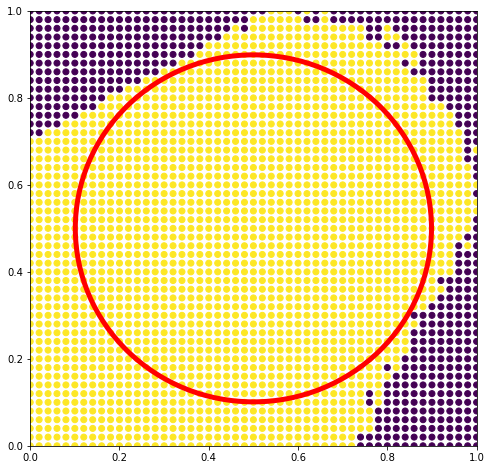

In [7]:
plot_data(p, out1)

In [18]:
model.accuracy(out1, p)

TypeError: eq received an invalid combination of arguments - got (torch.FloatTensor), but expected one of:
 * (int value)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.FloatTensor[0m)
 * (torch.LongTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.FloatTensor[0m)


In [9]:
p


 0.0000  0.0000
 0.0200  0.0000
 0.0400  0.0000
       ⋮        
 0.9600  1.0000
 0.9800  1.0000
 1.0000  1.0000
[torch.FloatTensor of size 2601x2]